In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
from sklearn.utils import shuffle
df = pd.read_csv("/content/drive/My Drive/Datasets/datacolab_distance/Copie de data_set.csv")
df = shuffle(df)

In [0]:
df.w_values=df.w_values/df.x_resol
df.h_values=df.h_values/df.y_resol
df.x_resol=df.x_resol/df.x_resol.max()
df.y_resol=df.y_resol/df.y_resol.max()
df.target=df.target/df.target.max()

In [0]:
x=df.drop(['target'],1)
y=df['target']
x_prediction=x[-200:]
y_prediction=y[-200:]
x=x[:-200+1]
y=y[:-200+1]

In [0]:
X=x.to_numpy()
Y=y.to_numpy()

In [149]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()#neural network model
model.add(layers.Dense(units=150, input_shape=[4]))#first input layer with 943 nods but 1 input
model.add(layers.Dense(150, activation='relu'))
model.add(layers.Dense(150, activation='relu'))
model.add(layers.Dense(1))#output layer with 1 nod to show the result
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])#mean squared error method and adam optimizer(i allways work with adam xD)
model.fit(X, Y,epochs=50,validation_set=0.2)#training the model for 50 times

Epoch 1/50
64/64 [==============================] - 0s 3ms/step - loss: 0.1312 - mean_squared_error: 0.0340
Epoch 2/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0412 - mean_squared_error: 0.0038
Epoch 3/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0343 - mean_squared_error: 0.0029
Epoch 4/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0370 - mean_squared_error: 0.0031
Epoch 5/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0373 - mean_squared_error: 0.0031
Epoch 6/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0367 - mean_squared_error: 0.0030
Epoch 7/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0329 - mean_squared_error: 0.0028
Epoch 8/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0329 - mean_squared_error: 0.0027
Epoch 9/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0349 - mean_squared_error: 0.0030
Epoch 10/50
64/64 [=========

In [0]:
X_prediction=x_prediction.to_numpy()
Y_prediction=y_prediction.to_numpy()

In [0]:
results=model.predict(X_prediction)

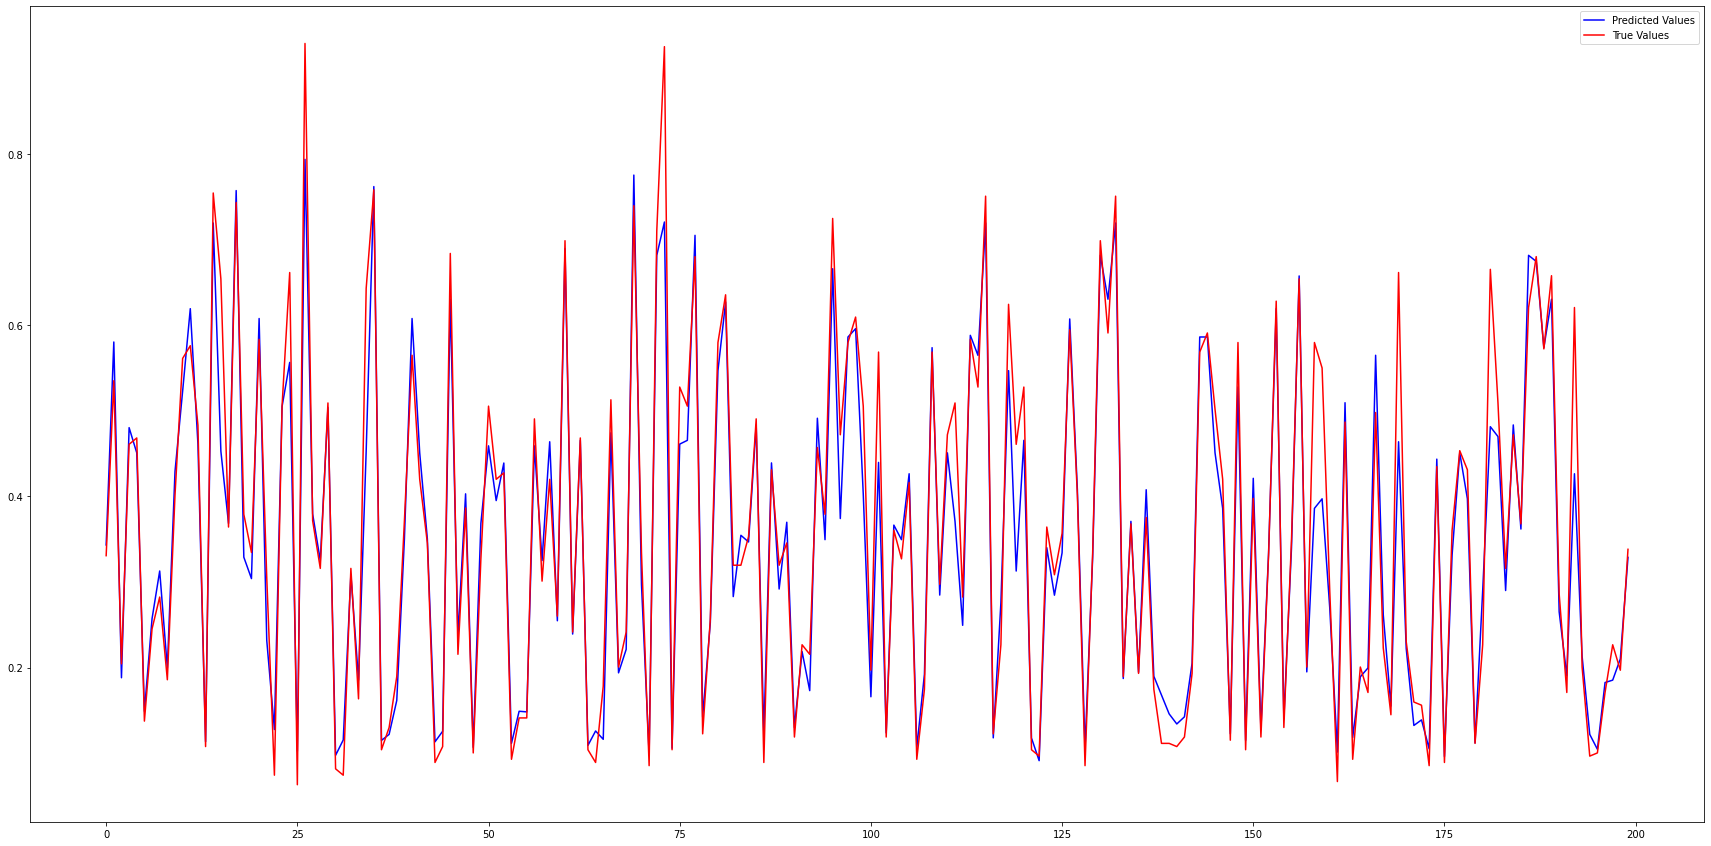

In [152]:
import matplotlib.pyplot as plt
t=range(200)
plt.figure(figsize=(30,15))
plt.plot(t, results, 'b') 
plt.plot(t, y_prediction.values, 'r') 
plt.legend(['Predicted Values','True Values'])
plt.show()

In [0]:
model.